In [63]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [48]:
tfd = tfp.distributions
tfb = tfp.bijectors
root = tfd.JointDistributionCoroutine.Root

In [109]:
co2_by_month = np.array('320.62,321.6,322.39,323.7,324.08,323.75,322.37,320.36,318.64,318.1,319.78,321.02,322.33,322.5,323.03,324.41,325,324.09,322.54,320.92,319.25,319.39,320.72,321.95,322.57,323.15,323.89,325.02,325.57,325.36,324.14,322.11,320.33,320.25,321.32,322.89,324,324.41,325.63,326.66,327.38,326.71,325.88,323.66,322.38,321.78,322.85,324.11,325.06,325.99,326.93,328.13,328.08,327.67,326.34,324.68,323.1,323.07,324.01,325.13,326.17,326.68,327.18,327.78,328.93,328.57,327.36,325.43,323.36,323.56,324.8,326.01,326.77,327.63,327.75,329.72,330.07,329.09,328.04,326.32,324.84,325.2,326.5,327.55,328.55,329.56,330.3,331.5,332.48,332.07,330.87,329.31,327.52,327.19,328.16,328.65,329.36,330.71,331.49,332.65,333.1,332.26,331.18,329.4,327.44,327.38,328.46,329.58,330.41,331.41,332.05,333.32,333.98,333.62,331.91,330.06,328.57,328.35,329.5,330.77,331.76,332.58,333.5,334.59,334.89,334.34,333.06,330.95,329.31,328.95,330.32,331.69,332.94,333.43,334.71,336.08,336.76,336.28,334.93,332.76,331.6,331.17,332.41,333.86,334.98,335.4,336.65,337.76,338.02,337.91,336.55,334.69,332.77,332.56,333.93,334.96,336.24,336.77,337.97,338.89,339.48,339.3,337.74,336.1,333.93,333.87,335.3,336.74,338.03,338.37,340.09,340.78,341.48,341.19,339.57,337.61,335.9,336.03,337.12,338.23,339.25,340.5,341.4,342.52,342.93,342.27,340.5,338.45,336.71,336.88,338.38,339.63,340.77,341.63,342.72,343.59,344.16,343.37,342.07,339.83,338,337.88,339.28,340.51,341.4,342.54,343.12,344.96,345.78,345.34,344,342.4,339.89,340.01,341.16,342.98,343.82,344.62,345.38,347.15,347.52,346.88,345.47,343.34,341.13,341.4,343.02,344.25,344.99,346.01,347.43,348.34,348.92,348.24,346.54,344.64,343.06,342.78,344.21,345.53,346.28,346.93,347.83,349.53,350.19,349.54,347.92,345.88,344.83,344.15,345.64,346.88,348,348.47,349.41,350.97,351.84,351.25,349.5,348.08,346.44,346.1,347.54,348.69,350.16,351.47,351.96,353.33,353.97,353.55,352.14,350.19,348.5,348.66,349.85,351.12,352.55,352.86,353.48,355.21,355.47,354.92,353.7,351.47,349.61,349.79,351.09,352.32,353.46,354.5,355.19,356,356.96,356.04,354.62,352.71,350.77,350.99,352.64,354.02,354.53,355.55,356.96,358.4,359.14,358.04,355.98,353.81,351.95,352.02,353.55,354.79,355.79,356.52,357.61,358.95,359.46,359.05,356.82,354.8,352.81,353.11,353.96,355.2,356.5,356.97,358.18,359.26,360.08,359.4,357.38,355.33,353.5,353.8,355.15,356.62,358.19,358.73,359.79,361.09,361.51,360.78,359.38,357.31,355.68,355.83,357.42,358.87,359.81,360.84,361.48,363.3,363.64,363.11,361.75,359.31,357.91,357.62,359.42,360.56,361.91,363.11,363.89,364.58,365.29,364.84,363.52,361.35,359.32,359.48,360.64,362.21,363.06,363.87,364.44,366.23,366.68,365.52,364.36,362.39,360.08,360.67,362.32,364.17,365.22,366.04,367.2,368.5,369.19,368.77,367.53,365.67,363.8,364.13,365.36,366.87,368.05,368.77,369.49,371.04,370.9,370.25,369.17,366.83,364.54,365.04,366.58,367.92,369.05,369.37,370.42,371.57,371.74,371.6,370.02,368.03,366.53,366.64,368.2,369.44,370.2,371.42,372.04,372.78,373.94,373.23,371.54,369.47,367.88,368.02,369.6,371.16,372.36,373,373.44,374.77,375.48,375.33,373.95,371.41,370.63,370.18,372.01,373.71,374.61,375.55,376.04,377.58,378.28,378.07,376.54,374.42,372.92,372.94,374.29,375.63,376.73,377.31,378.33,380.44,380.56,379.49,377.71,375.77,373.99,374.17,375.79,377.39,378.29,379.56,380.07,382.01,382.21,382.05,380.63,378.64,376.38,376.77,378.27,379.92,381.33,381.98,382.53,384.33,384.89,384,382.25,380.44,378.77,379.03,380.11,381.63,382.55,383.68,384.31,386.2,386.38,385.85,384.42,381.81,380.83,380.83,382.32,383.58,385.04,385.81,385.8,386.74,388.48,388.02,386.22,384.05,383.05,382.75,383.98,385.08,386.63,387.1,388.5,389.54,390.15,389.6,388.05,386.06,384.64,384.32,386.05,387.48,388.55,390.08,391.02,392.39,393.24,392.26,390.35,388.53,386.85,387.18,388.69,389.83,391.33,391.96,392.49,393.4,394.33,393.75,392.64,390.25,389.05,388.98,390.3,391.86,393.13,393.42,394.43,396.51,396.96,395.97,394.6,392.61,391.2,391.09,393.03,394.42,395.69,396.94,397.35,398.44,400.06,398.96,397.45,395.49,393.47,393.77,395.27,396.9,398.01,398.18,399.56,401.44,401.98,401.41,399.17,397.3,395.49,395.74,397.32,398.88,399.94,400.4,401.6,403.52,404.03,402.81,401.54,398.93,397.43,398.22,400.17,401.82,402.58,404.09,404.79,407.5,407.59,406.94,404.43,402.17,400.95,401.43,403.57,404.48,406,406.57,406.99,408.88,409.84,409.05,407.13,405.17,403.2,403.57,405.1,406.68,407.98,408.36,409.21,410.24,411.23,410.81,408.83,407.02,405.53,405.93,408.04,409.17,410.85,411.59,411.91,413.46,414.76,413.89,411.78,410.01,408.48,408.4,410.16,411.81,413.3,414.05,414.45,416.11,417.15,416.29,414.42,412.52,411.18,411.12,412.88,413.89,415.15,416.47,417.16,418.24,418.95,418.7,416.65,414.34,412.91,413.55,414.82,416.43,418.01,418.99,418.45,420.02,420.77,420.68,418.68,416.76,415.41,415.31'.split(',')).astype(np.float32)

In [110]:
co2_df = pd.DataFrame(co2_by_month, columns=['co2'])

In [111]:
co2_df['month'] = np.arange(1, len(co2_df) + 1, dtype=np.int32)

In [112]:
co2_df.set_index('month', inplace=True, drop= True)

In [113]:
num_of_forecast_steps = 120
co2_train = co2_df[:-num_of_forecast_steps]
co2_test = co2_df[-num_of_forecast_steps:]

In [114]:
fig = go.Figure()

fig.add_trace(go.Scatter(x= co2_train.index, y= co2_train.co2, mode='lines', name='train'))
fig.add_trace(go.Scatter(x= co2_test.index, y= co2_test.co2, mode='lines', name='test'))
fig.update_layout(title='CO2 concentration', xaxis_title='month', yaxis_title='co2')
fig.show()

In [116]:
trend_all = np.linspace(0., 1., len(co2_df))[..., None].astype(np.float32)
trend = trend_all[:-num_of_forecast_steps]

seasonality_all = pd.get_dummies(co2_df.index).values.astype(np.float32)
seasonality = seasonality_all[:-num_of_forecast_steps]

In [124]:
@tfd.JointDistributionCoroutine
def ts_regression_model():
   intercept = yield root(tfd.Normal(0., 100., name='intercept'))
   trend_coeff = yield root(tfd.Normal(0., 10., name='trend_coeff'))
   seasonality_coeff = yield root(tfd.Sample(tfd.Normal(0., 10., name='seasonality_coeff'), sample_shape= seasonality.shape[-1]))
   noise = yield root(tfd.Normal(loc= 0., scale= 5., name= "noise_sigma"))
   
   y_hat = (intercept[..., None] + tf.einsum("ij,...->...i", trend, trend_coeff) + tf.einsum("ij,...j->...i", seasonality, seasonality_coeff))
   observed = yield tfd.Independent(tfd.Normal(y_hat, noise[..., None]), reinterpreted_batch_ndims= 1, name= "observed")

ts_regression_model.log_prob_parts(ts_regression_model.sample(4))

StructTuple(
  intercept=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-5.6036687, -6.383669 , -6.38389  , -5.99988  ], dtype=float32)>,
  trend_coeff=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-3.2310991, -3.4621058, -3.2887936, -3.9444098], dtype=float32)>,
  var2=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2570.8865, -2544.6895, -2534.9426, -2517.731 ], dtype=float32)>,
  noise_sigma=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2.6731925, -2.5732303, -5.5306063, -4.3758764], dtype=float32)>,
  observed=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-1364.2937, -1030.0177,        nan, -2057.72  ], dtype=float32)>
)

In [126]:
run_mcmc = tf.function(tfp.experimental.mcmc.windowed_adaptive_nuts, autograph= False, jit_compile= True)

In [133]:
%%time
mcmc_samples, sampler_stats = run_mcmc(1000, ts_regression_model, n_chains=4, num_adaptation_steps=1000, observed=co2_train["co2"].values)


2024-01-28 11:20:48.452258: W tensorflow/compiler/tf2xla/kernels/random_ops.cc:105] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. sanitize_seed/seed
2024-01-28 11:20:48.669094: W tensorflow/compiler/tf2xla/kernels/assert_op.cc:38] Ignoring Assert operator mcmc_retry_init/assert_equal_1/Assert/AssertGuard/Assert
I0000 00:00:1706437267.324415       1 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-01-28 11:21:07.660020: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


CPU times: user 4min 6s, sys: 27.4 s, total: 4min 33s
Wall time: 1min 50s


In [136]:
regression_idata = az.from_dict(
    posterior={
        k:np.swapaxes(v.numpy(), 1, 0)
        for k, v in mcmc_samples._asdict().items()},
    sample_stats={
        k:np.swapaxes(sampler_stats[k], 1, 0)
        for k in ["target_log_prob", "diverging", "accept_ratio", "n_steps"]}
)

az.summary(regression_idata)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,-0.002,0.941,-1.166,1.004,0.469,0.359,4.0,4.0,31633592.87
trend_coeff,-0.172,1.371,-1.501,1.702,0.683,0.523,4.0,4.0,31633592.87
var2[0],-0.073,0.905,-1.092,1.328,0.451,0.345,4.0,4.0,31633592.87
var2[1],1.539,0.212,1.251,1.756,0.105,0.081,4.0,4.0,31633592.87
var2[2],0.008,0.920,-1.563,0.675,0.458,0.351,4.0,4.0,31633592.87
...,...,...,...,...,...,...,...,...,...
var2[678],0.600,0.721,-0.373,1.410,0.359,0.275,4.0,4.0,31633592.87
var2[679],0.406,1.144,-0.855,1.831,0.569,0.436,4.0,4.0,31633592.87
var2[680],-0.187,0.915,-1.554,0.941,0.456,0.349,4.0,4.0,31633592.87
var2[681],-0.476,0.911,-1.265,1.072,0.454,0.347,4.0,4.0,31633592.87


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning:

Your data appears to have a single value or no finite values

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning:

Your data appears to have a single value or no finite values

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning:

Your data appears to have a single value or no finite values

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arviz/stats/density_utils.py:487: UserWarning:

Your data appears to have a single value or no finite values



array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'trend_coeff'}>,
        <AxesSubplot:title={'center':'trend_coeff'}>],
       [<AxesSubplot:title={'center':'var2'}>,
        <AxesSubplot:title={'center':'var2'}>],
       [<AxesSubplot:title={'center':'noise_sigma'}>,
        <AxesSubplot:title={'center':'noise_sigma'}>]], dtype=object)

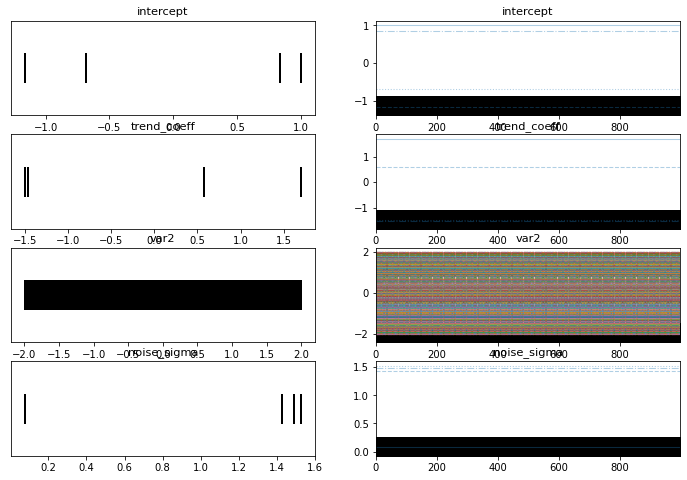

In [137]:
az.plot_trace(regression_idata, compact= True)